# Bank Personal Loan Model
## Project - 1
### By Shivangi Singh 

#### Given was the data in the form of csv file and the goal is to predict the likelihood of a customer getting the personal loan.

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [240]:
mydata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [241]:
mydata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [242]:
mydata.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [243]:
mydata.shape

(5000, 14)

In [244]:
mydata.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### We can observe that experience has some negative values and experience can't be negative.
#### There is a large difference in the mean and maximum values of Income,  CCAvg, Mortgage,Experience, Security Account, CD Accounts and CreditCard.

In [245]:
mydata.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### no null values , let's check the datatypes

In [246]:
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### all the attributes have valid datatypes.

In [247]:
mydata.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### We will be segregating the variabes in two sets

In [248]:
categorical_variables=[col for col in mydata.columns if mydata[col].nunique()<=5]
print(categorical_variables)
continuous_variables=[col for col in mydata.columns if mydata[col].nunique()>5]
print(continuous_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [249]:
categorical_variables.remove("Personal Loan")
print(categorical_variables)
continuous_variables.remove("ID")
print(continuous_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

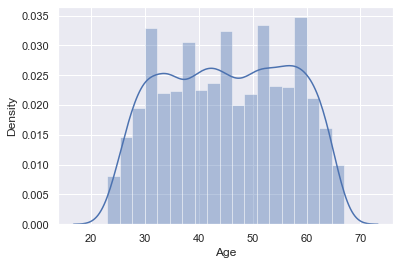

In [250]:
sns.distplot(mydata.Age)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

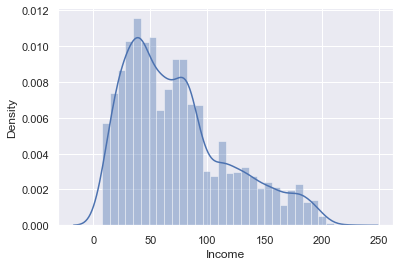

In [251]:
sns.distplot(mydata.Income)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

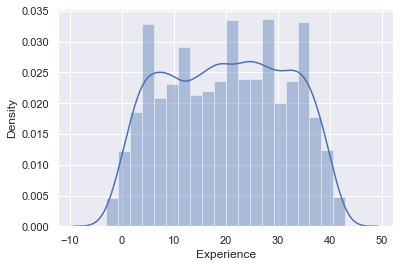

In [252]:
sns.distplot(mydata.Experience)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

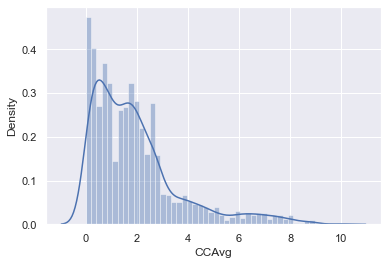

In [253]:
sns.distplot(mydata.CCAvg)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

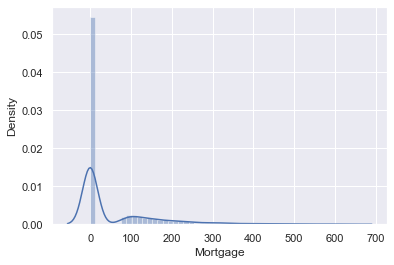

In [254]:
sns.distplot(mydata.Mortgage)

#### We can see that Age and Experience are uniformaly distributed.
#### Income, CCAvg, Mortgage are Skewed positively.
#### ZIP code is negative Skew .
#### Mortgage contain most of the values as 0

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

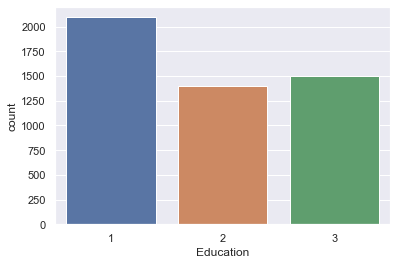

In [255]:
sns.countplot(mydata.Education)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

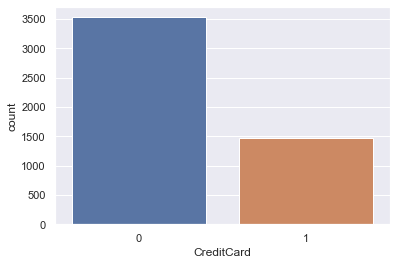

In [256]:
sns.countplot(mydata.CreditCard)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Online', ylabel='count'>

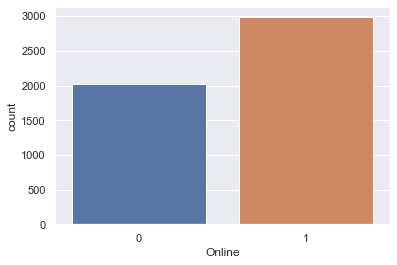

In [257]:
sns.countplot(mydata.Online)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='count'>

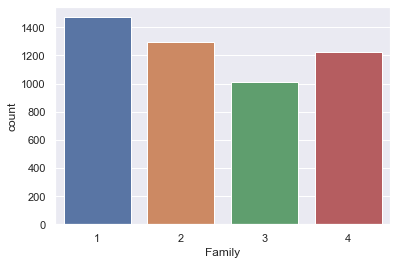

In [258]:
sns.countplot(mydata. Family)

<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

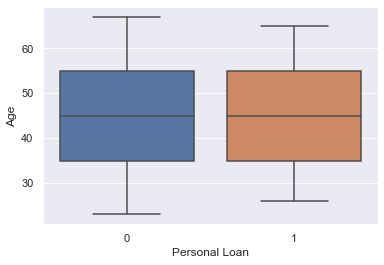

In [259]:
sns.boxplot(x="Personal Loan",y="Age",data=mydata)

<AxesSubplot:xlabel='Personal Loan', ylabel='Income'>

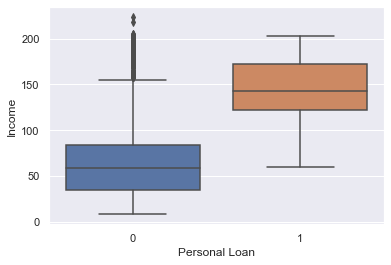

In [260]:
sns.boxplot(x="Personal Loan",y="Income",data=mydata)

<AxesSubplot:xlabel='Personal Loan', ylabel='Experience'>

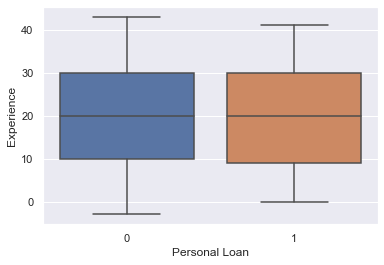

In [261]:
sns.boxplot(x="Personal Loan",y="Experience",data=mydata)

<AxesSubplot:xlabel='Personal Loan', ylabel='ZIP Code'>

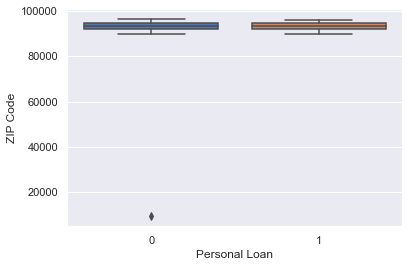

In [262]:
sns.boxplot(x="Personal Loan",y="ZIP Code",data=mydata)

<AxesSubplot:xlabel='Personal Loan', ylabel='Mortgage'>

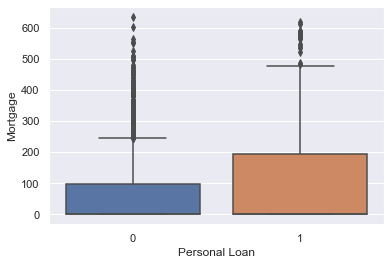

In [263]:
sns.boxplot(x="Personal Loan",y="Mortgage",data=mydata)

#### We can see the outliers in the above boxplot.

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

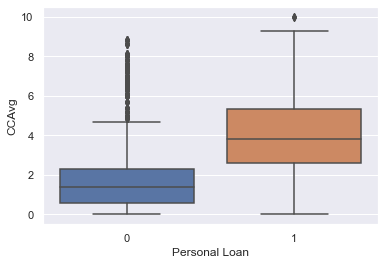

In [264]:
sns.boxplot(x="Personal Loan",y="CCAvg",data=mydata)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

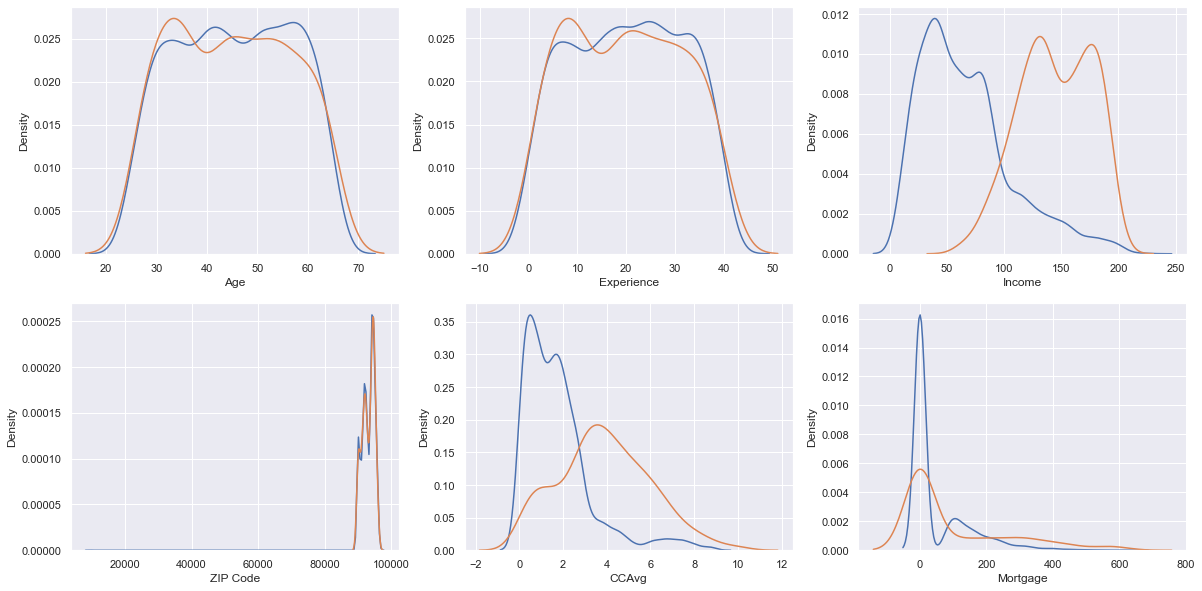

In [265]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    ax1=sns.distplot(mydata[col][mydata['Personal Loan']==0],hist=False, label="No Personal Loan")
    sns.distplot(mydata[col][mydata['Personal Loan']==1],hist=False,ax=ax1, label="Personal Loan")

#### Personal Loan doesn't show variations with Age and Experience.
#### Income majorly affects the Personal Loan. Customers with High Income have high chances of having Personal Loan.
#### CCAvg also show a good relationship with Personal Loan. Customers with personal loan have high Avg. spending on credit cards per month
#### Customers who want to have high Mortgage have opted for Personal Loan

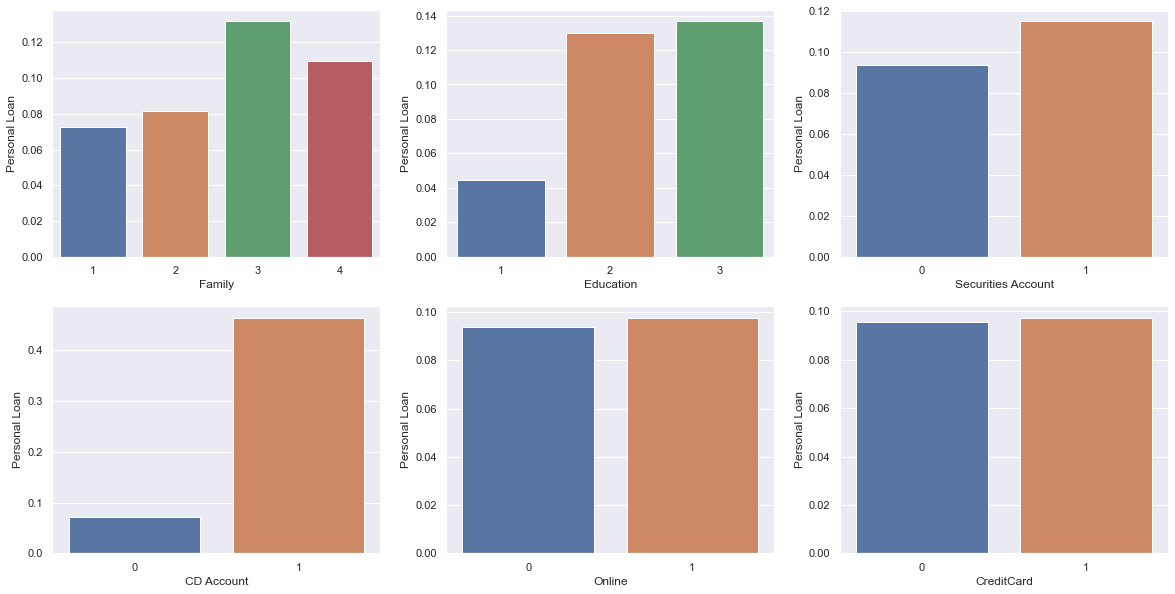

In [266]:
fig_n=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    bx=fig_n.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal Loan',data=mydata,ci=None)

### The observations from the above plots are: 
#### Customers with family size equal to 3 have more chances of having Personal Loan.
#### Customers with Undergrad degree have less chances of having Personal Loan as compared to other customers having Graduate or Advanced/Professional degree
#### Customers with CD Account and Securities Account have more chances of having Personal Loan.
#### Online Facitilies or not, having credit card or not doesn't effect much in chances of having Personal Loan
#### Income is a strong attribute which effect the chances of having Personl Loan. High the Income High the chances of having Personal Loan. So we will analyse Income with other attributes now .

In [267]:
con=continuous_variables.copy()
con.remove('Income')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\l

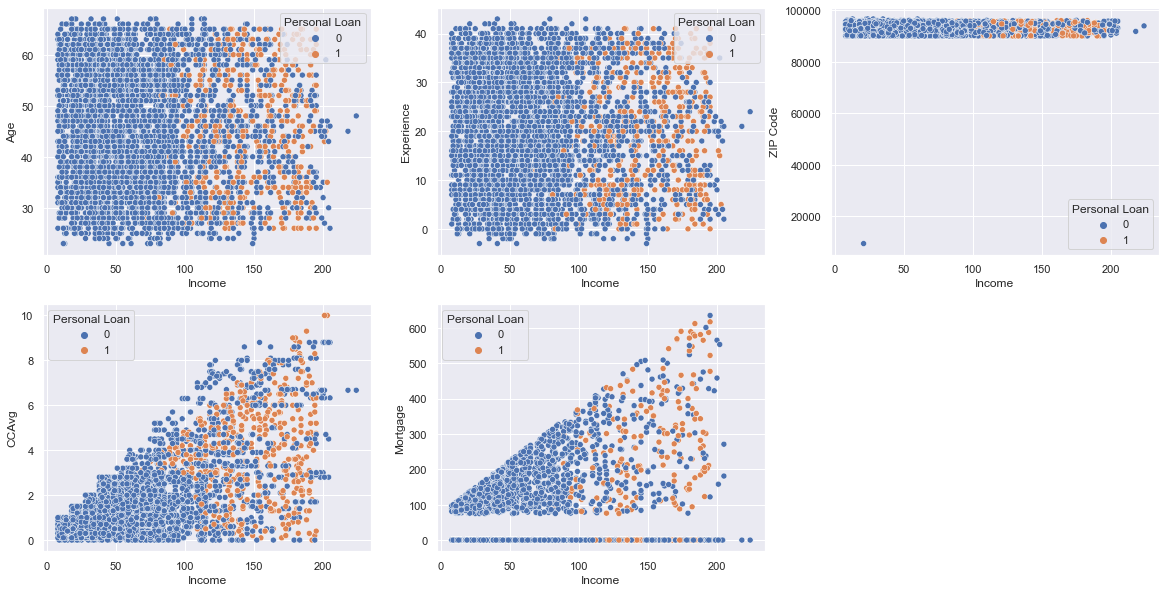

In [268]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    bx=fig.add_subplot(2,3,i+1)
    sns.scatterplot('Income',col,hue='Personal Loan',data=mydata)

#### Age and Experience have not effect much as customer with high income no matter of what age group have chances of having Personal Loan.
#### ZIP Code shows that all the customers are of particular area and they have no pattern in chances of having personal loan.
#### Customers with high income and having personal loan shows high Avg. spending on credit cards per month and high Value of house mortgage

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\l

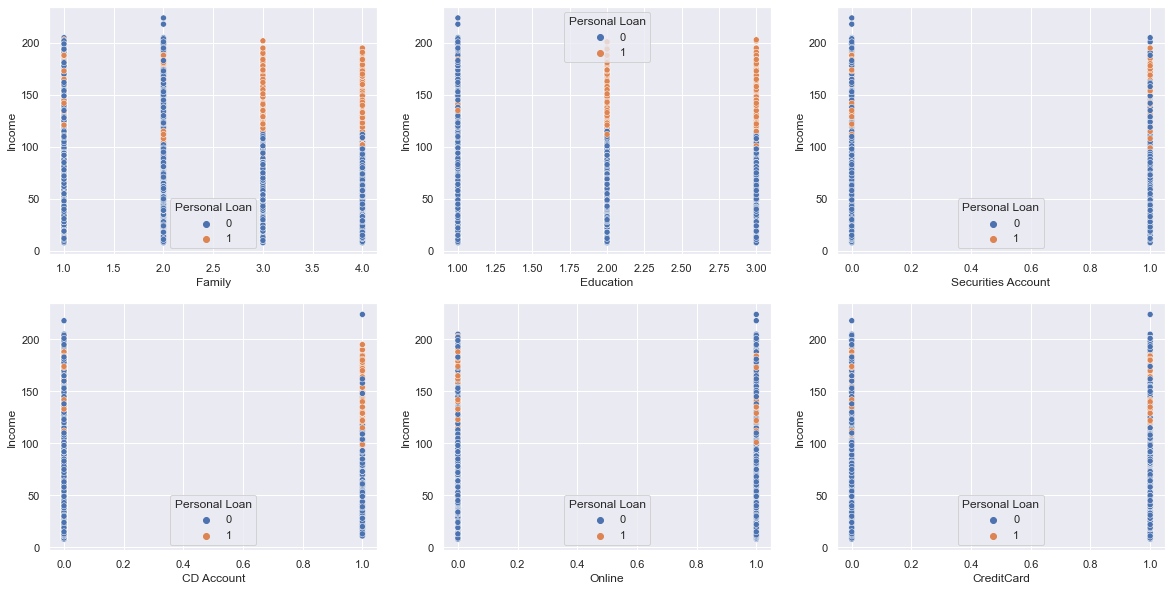

In [269]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'Income',hue='Personal Loan',data=mydata)

#### Customers with high Degrees and having family size greater then 3 with high income have personal loan.
#### Customers with CD Accounts have chances of having Personal Loan, So now  we will find relation of CCAvg with other attributes


In [270]:
con.remove('CCAvg')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\l

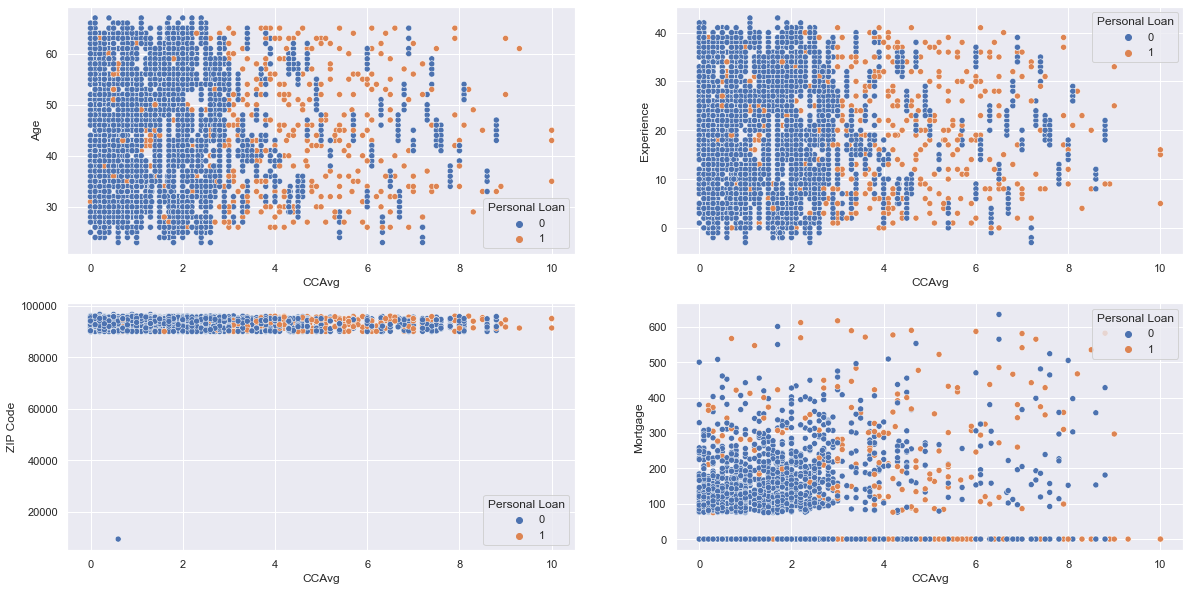

In [271]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,2,i+1)
    sns.scatterplot('CCAvg',col,hue='Personal Loan',data=mydata)

#### Age and Experience show same patterns on customers with personal loan or not.
#### high CCAvg and Mortgage have more chances of customer having Personal Loan

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\l

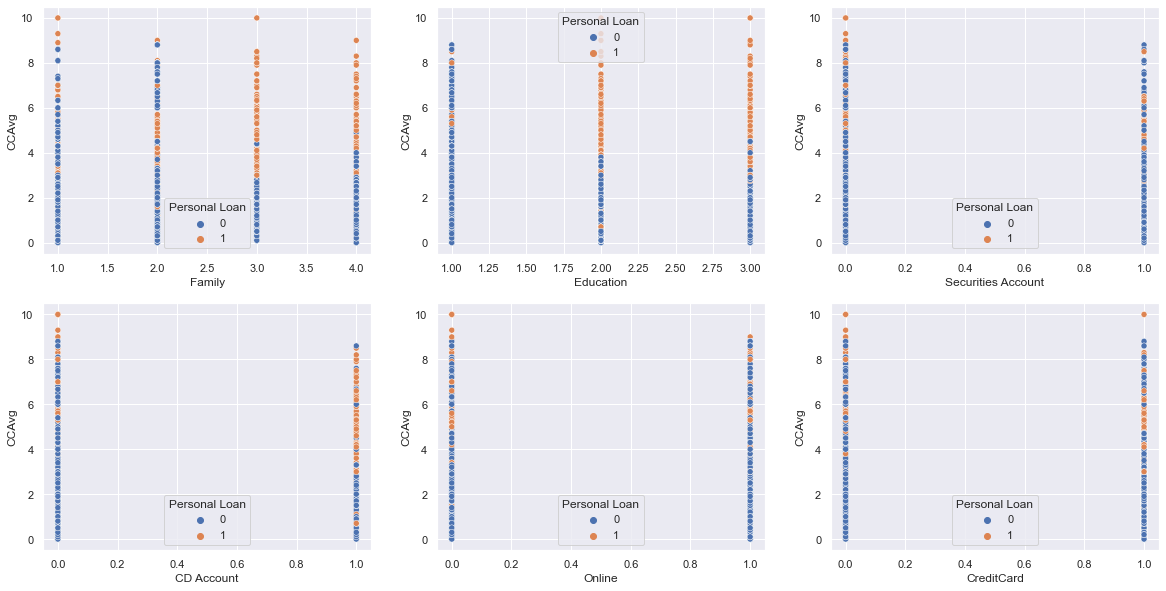

In [272]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'CCAvg',hue='Personal Loan',data=mydata)

#### CCAvg Shows almost similar trends as shown by Income

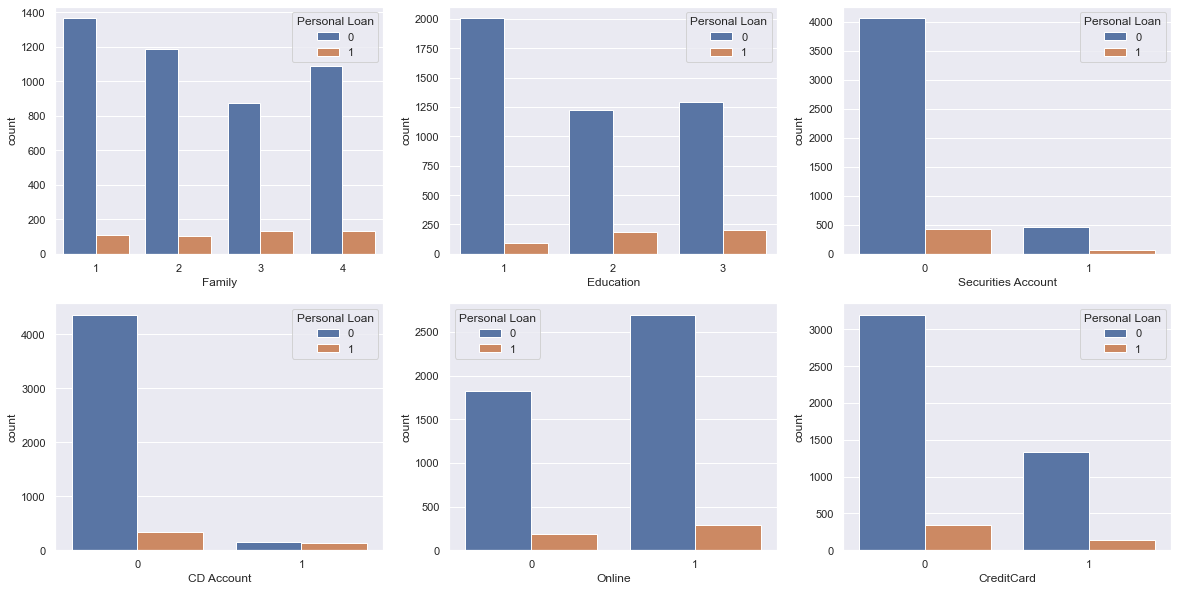

In [273]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(x=col,hue='Personal Loan',data=mydata)

#### these graph clearly depicts the facts that we had observed previously above like person with CD Account have more chances of having Personal Loan, Now we will clean our data.

In [274]:
mydata.drop_duplicates(inplace=True)

In [275]:
mydata.shape

(5000, 14)

In [276]:
mydata.set_index("ID",inplace=True)

#### Since ZIP Code doesn't show any effect on the chances of Personal Loan it is better to remove it form our data

In [277]:
mydata.drop('ZIP Code',axis=1,inplace=True)

#### Zip code contain data of particular area so it contain minimum variations so we removed it.

#### Finding relationship between Experience and Age

<AxesSubplot:title={'center':'Correlation'}>

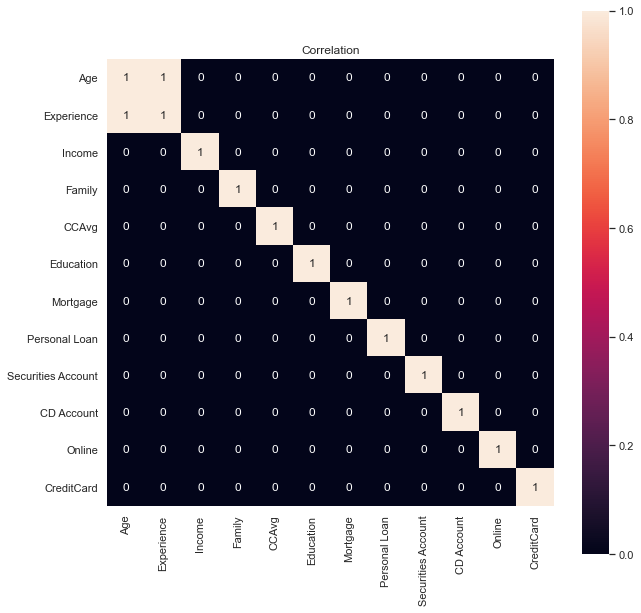

In [278]:
corr=mydata.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr > 0.90, annot=True, square=True)

In [279]:
mydata[['Age','Experience','Personal Loan']].corr()

,Age,Experience,Personal Loan
Age,1.000000,0.994215,-0.007726
Experience,0.994215,1.000000,-0.007413
Personal Loan,-0.007726,-0.007413,1.000000


#### since Age shows a little better correlation with Personal loan we will drop the Experience attribute

In [280]:
mydata.drop('Experience',axis=1,inplace=True)

#### Creating Attributes

#### We will try to create a new feature Account contain 1 if any customer is having either CD Account or Security Account or zero if customer have none of them and will try to find its relation with target variable if it shows a better relation compaired to other two then we will keep it otherwise we will remove it


In [281]:

mydata['Account']=mydata['CD Account']+mydata['Securities Account']
mydata[['CD Account','Securities Account','Account','Personal Loan']].corr()

,CD Account,Securities Account,Account,Personal Loan
CD Account,1.000000,0.317034,0.756219,0.316355
Securities Account,0.317034,1.000000,0.860312,0.021954
Account,0.756219,0.860312,1.000000,0.185185
Personal Loan,0.316355,0.021954,0.185185,1.000000


#### Since it shows a weak correlation as compared to CD Account we will not include it.


In [282]:

mydata.drop('Account',axis=1,inplace=True)

#### we will now try to create a attribute facilities which will contain 1 if customer uses the bank facilities like online banking or credit card else it will contain 0 and then we will check for relation with the target variable if it is better then the previous one we will keep that attribute

In [283]:
mydata['Facilities']=mydata['Online']+mydata['CreditCard']
mydata[['Facilities','Online','CreditCard','Personal Loan']].corr()

,Facilities,Online,CreditCard,Personal Loan
Facilities,1.000000,0.734052,0.682178,0.006493
Online,0.734052,1.000000,0.004210,0.006278
CreditCard,0.682178,0.004210,1.000000,0.002802
Personal Loan,0.006493,0.006278,0.002802,1.000000


#### We will keep the Facilities attribute and drop the Online and CreditCard attributes

In [284]:
mydata.drop(['Online','CreditCard'],axis=1,inplace=True)


In [285]:
mydata.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Facilities
ID,,,,,,,,,,
1,25,49,4,1.6,1,0,0,1,0,0
2,45,34,3,1.5,1,0,0,1,0,0
3,39,11,1,1.0,1,0,0,0,0,0
4,35,100,1,2.7,2,0,0,0,0,0
5,35,45,4,1.0,2,0,0,0,0,1


#### Now we will Apply Scaling
#### I will be using Logistic Regression and Decision Tree to find the accuracy of my model

In [286]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [287]:
scaled_mydata=scaler.fit_transform(mydata.drop('Personal Loan',axis=1))


In [288]:
scaled_mydata=pd.DataFrame(scaled_mydata)

In [289]:
scaled_mydata.columns=mydata.drop('Personal Loan',axis=1).columns
scaled_mydata.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Facilities
0,-1.774417,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.327815
1,-0.029524,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.327815
2,-0.552992,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.327815
3,-0.901970,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.327815
4,-0.901970,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,0.162772


In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [291]:
X=scaled_mydata
y=mydata['Personal Loan']

In [292]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [293]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

#### LogisticRegression

In [294]:
model_list.append('LogisticRegression')
lm=LogisticRegression()

In [295]:
lm.fit(x_train,y_train)

LogisticRegression()

In [296]:
res_lm=lm.predict(x_test)

In [297]:
lm_score=f1_score(y_test,res_lm)
model_f1_score.append(lm_score)
lm_score

0.6793893129770991

In [298]:
lm_accuracy=accuracy_score(y_test,res_lm)
model_accuracy_score.append(lm_accuracy)
lm_accuracy

0.944

In [299]:
print(classification_report(y_test,res_lm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.86      0.56      0.68       158

    accuracy                           0.94      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



<AxesSubplot:>

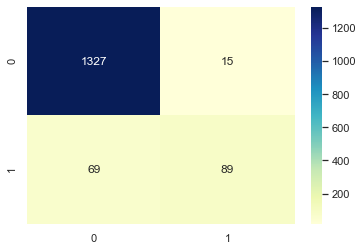

In [300]:
sns.heatmap(confusion_matrix(y_test,res_lm),annot=True,fmt='',cmap='YlGnBu')

#### DecisionTreeClassifier

In [301]:
model_list.append('DecisionTreeClassifier')
tree=DecisionTreeClassifier()

In [302]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [303]:
res_tree=tree.predict(x_test)

In [304]:
tree_score=f1_score(y_test,res_tree)
model_f1_score.append(tree_score)
tree_score

0.9137380191693291

In [305]:
tree_accuracy=accuracy_score(y_test,res_tree)
model_accuracy_score.append(tree_accuracy)
tree_accuracy

0.982

In [306]:
print(classification_report(y_test,res_tree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.92      0.91      0.91       158

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



<AxesSubplot:>

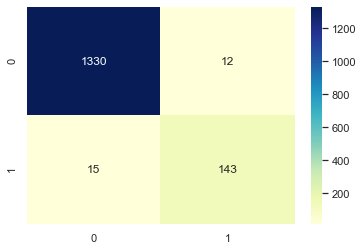

In [307]:
sns.heatmap(confusion_matrix(y_test,res_tree),annot=True,fmt='',cmap='YlGnBu')

#### Ploting the Results
#### F1-Score

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


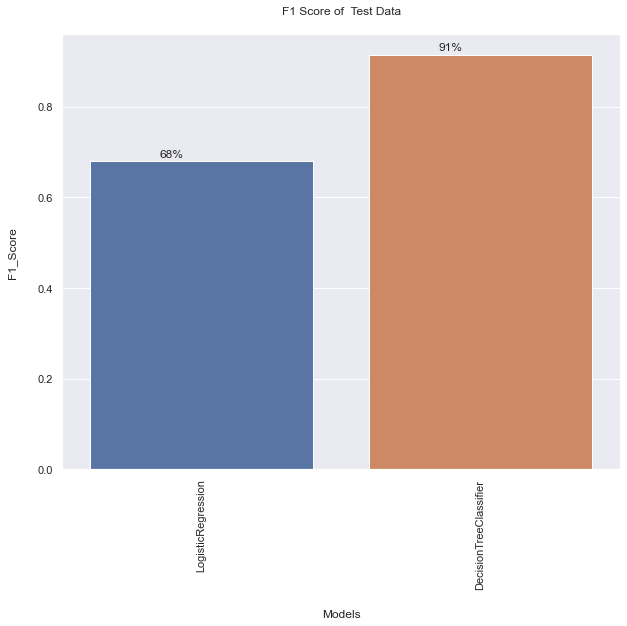

In [309]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(model_list,model_f1_score)
ax.set_title("F1 Score of  Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("F1_Score",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))


#### Now let us see the Accuracy Score

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


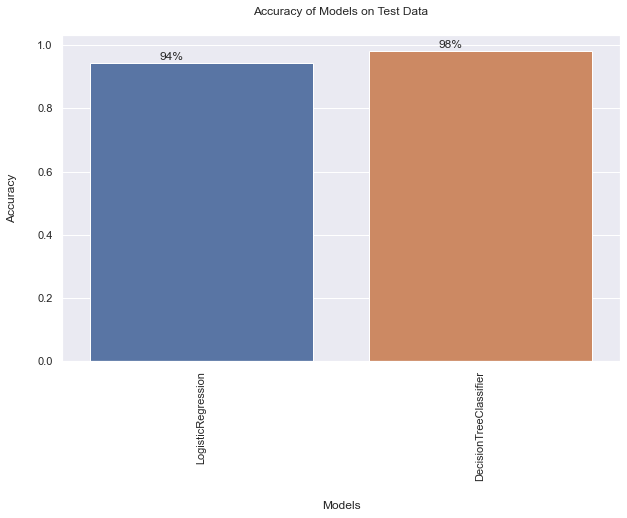

In [310]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(model_list,model_accuracy_score)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

### Conclusion
#### Between the two models that we have implemented DecisionTreeClassifier gives the  best F1 Score and accuracy score with almost accuracy of 98% and F1-Score of 91%